# Advanced clustering on real-world data

For this practical, you will work in groups (which you have chosen on eCampus). You will apply the questions in this notebook to your assigned dataset. (Note that some of the datasets are very large (>10k samples). This might make the execution of some algorithms very slow. If that is the case, do not hesitate to talk to your teacher.)

We will spend two practical sessions on this notebook: during the first session, you will apply K-Means and Hierarchical clustering. During the second session, you will apply Spectral clustering and compare your obtained results.

Most cells in this notebook are blank, you must fill them in either with code or with written interpretation. Your grade will mostly depend on the quality of your interpretations, make sure to relate your conclusions to the context of your dataset.

## TD2 (part II): K-means and Hierarchical clustering


### Package import

**Tip**: look at the documentation of the packages and methods imported, they can help you answer some questions.

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

Load the dataset, separate the labels from the variables. In some cases, you might also want to drop some variables (e.g. names, identifiers, anything that has one unique value per sample that will not help you form groups).

In [180]:
df = pd.read_csv('train.csv')

df

In [181]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Data preprocessing

Visualize the 10 first rows of both data and classes

In [182]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


Are there any missing values (in data)? What type are the variables?

In [183]:
# Check for missing values

missing_values = df.isnull().sum()
variable_types = df.dtypes

print("Missing values:")
print(missing_values)
# Il y a pas de valeurs manquantes car toutes les colonnes ont 0 valeurs manquantes.

print("\nVariable types:")
print(variable_types)



Missing values:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Variable types:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


Use the describe method and explain what you obtain.

In [184]:
df.describe()
# On peut voir que le résumé statistique nous donne des informations sur chaque colonne numérique de notre DataFrame (train.csv). 
# On a le nombre d'observations (count), la moyenne (mean), l'écart type (std), les valeurs minimale (min) et maximale (max), ainsi que les quartiles (25%, 50%, 75%).
# Par exemple, on peut voir que la moyenne de la colonne "battery_power" est de 1238.518, avec un écart type de 439.418.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


If your dataset contains missing data, follow the process seen in the first practical to impute missing data. Make sure to impute numeric and nominal data with different strategies.

Explain your choice of imputation strategy for each data type.

Do you think the data should be scaled? If yes, do it and compare the obtained data to the original data (compare only the first 20 features if the dataset is large).

In [185]:
from sklearn.preprocessing import StandardScaler
# Oui, il faut mettre a l'echelle les donnees pour s'assurer que variables sont sur la même échelle et d'éviter que certaines variables dominent les autres en termes de distance ou de similarité. 
# Cela peut avoir un impact significatif sur les résultats du clustering.

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# # Comparer les premières 20 lignes des données originales et des données mises à l'échelle
print("Données originales :")
print(df.head(20))
print("\nDonnées mises à l'échelle :")
print(pd.DataFrame(scaled_data , columns=df.columns).head(20))


Données originales :
    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0             842     0          2.2         0   1       0           7    0.6   
1            1021     1          0.5         1   0       1          53    0.7   
2             563     1          0.5         1   2       1          41    0.9   
3             615     1          2.5         0   0       0          10    0.8   
4            1821     1          1.2         0  13       1          44    0.6   
5            1859     0          0.5         1   3       0          22    0.7   
6            1821     0          1.7         0   4       1          10    0.8   
7            1954     0          0.5         1   0       0          24    0.8   
8            1445     1          0.5         0   0       0          53    0.7   
9             509     1          0.6         1   2       1           9    0.1   
10            769     1          2.9         1   0       0           9    0.1   
11     

How many classes are there? Plot the distribution of the classes. Is the data balanced or imbalanced?

In [186]:
num_classes = df['price_range'].nunique()
print(f'Il y a {num_classes} classes.')


Il y a 4 classes.


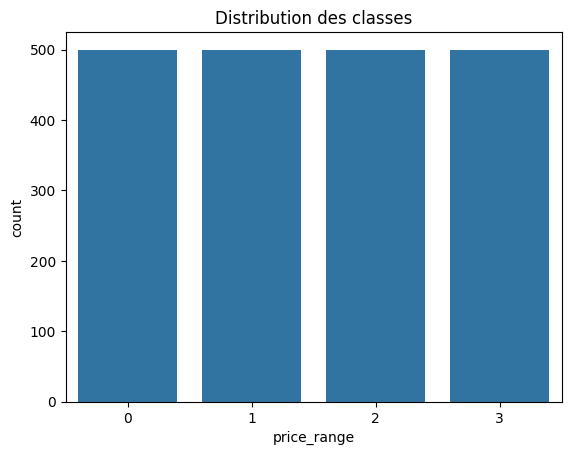

In [187]:
sns.countplot(x='price_range', data=df)

plt.title('Distribution des classes')
plt.show()

In [188]:
df['price_range'].value_counts()
# On a 500 observations de chaque classes. Donc, les donnees sont equilibrees. 

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Encode your classes into a numerical variable.

In [189]:
le = LabelEncoder()
classes_encoded = le.fit_transform(df['price_range'])

Check if your data and classes are numpy arrays. If that is not the case, transform your data and classes into numpy arrays.

In [190]:


# Vérifier si les données sont un tableau numpy
if type(classes_encoded) != np.ndarray:
    classes_encoded = np.array(classes_encoded)
    print("Les données ont été converties en un tableau numpy.");
print(classes_encoded)



[1 2 2 ... 3 0 3]


### Clustering algorithm 1: K-means

Apply the K-means algorithm with 2 centers. Look at the default parameters the method takes. Make sure the algorithm doesn't run more than 500 iterations.

In [191]:
kmeans = KMeans(n_clusters=2, max_iter=500)



In [192]:
kmeans.fit(df)

KMeans(max_iter=500, n_clusters=2)

What does the max_iter parameter do?

In [193]:
# 500 iters 

How many samples are in each cluster?

In [194]:
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)

for u, c in zip(unique, counts):
    print(f'Cluster {u}: {c} samples')

Cluster 0: 977 samples
Cluster 1: 1023 samples


In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

For n_clusters = 2 The average silhouette_score is : 0.4012285898271234
For n_clusters = 3 The average silhouette_score is : 0.27780717837152064
For n_clusters = 4 The average silhouette_score is : 0.25312541198022037
For n_clusters = 5 The average silhouette_score is : 0.242025607646247
For n_clusters = 6 The average silhouette_score is : 0.2353122790104193
For n_clusters = 7 The average silhouette_score is : 0.22817426715789446
For n_clusters = 8 The average silhouette_score is : 0.22225829356648052
For n_clusters = 9 The average silhouette_score is : 0.21699002592719677
For n_clusters = 10 The average silhouette_score is : 0.2214416400549511


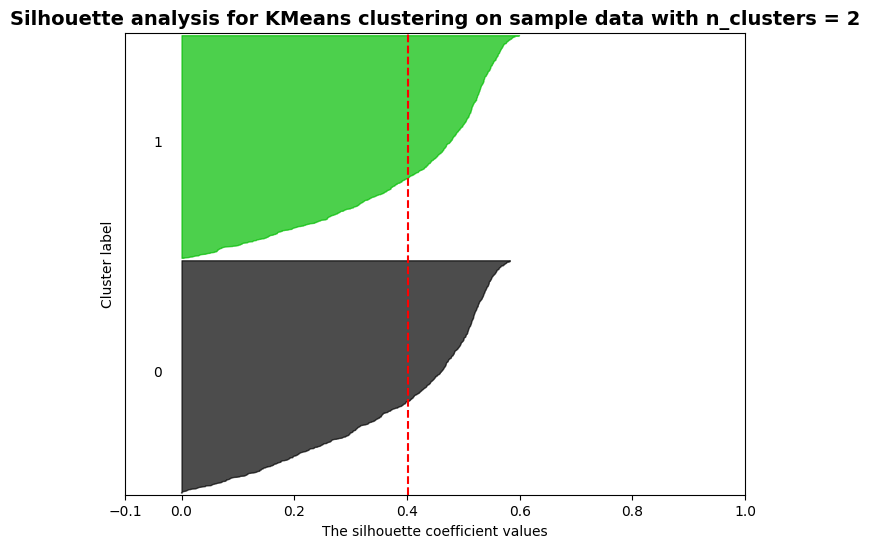

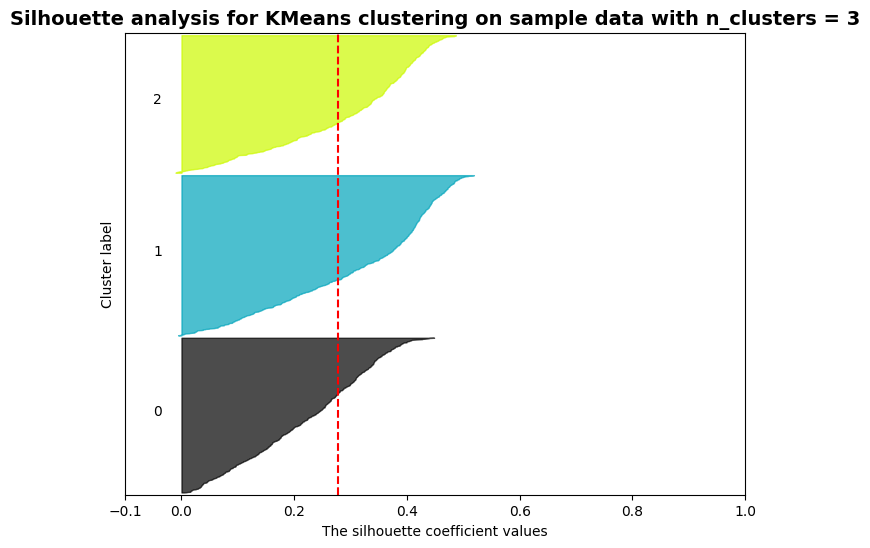

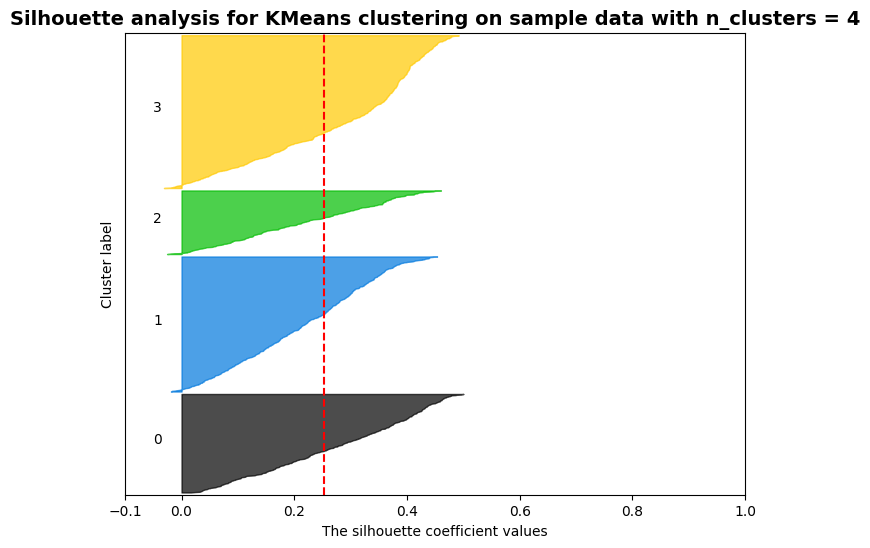

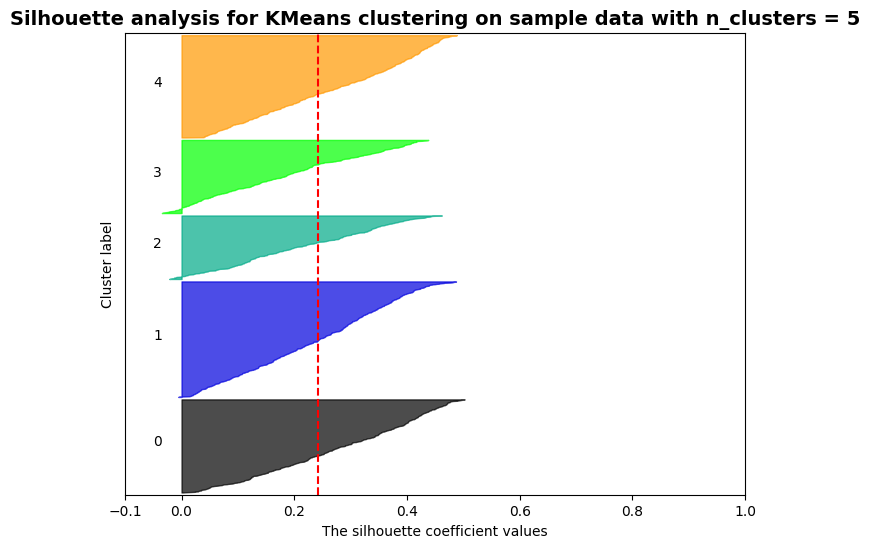

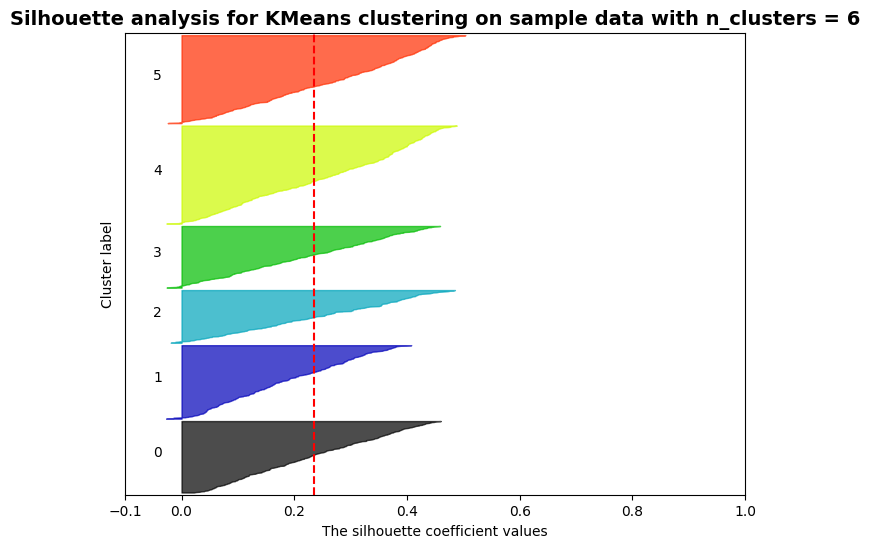

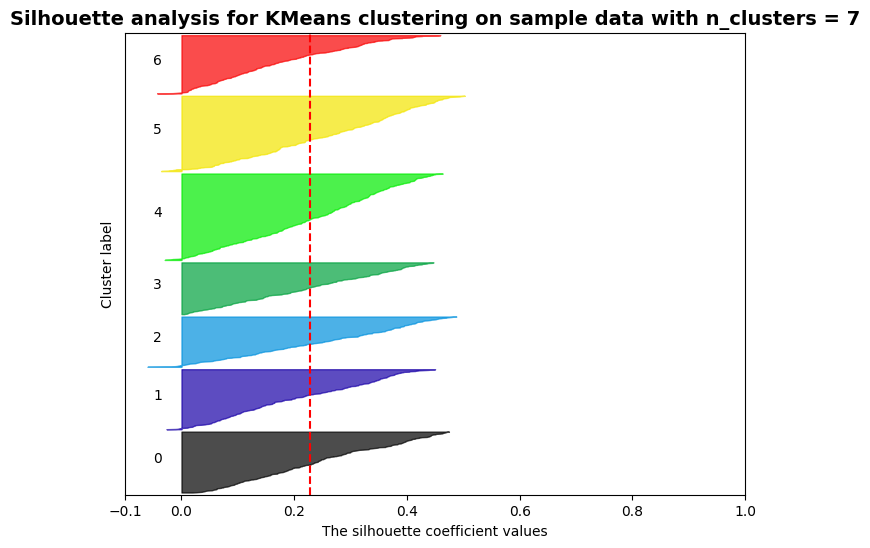

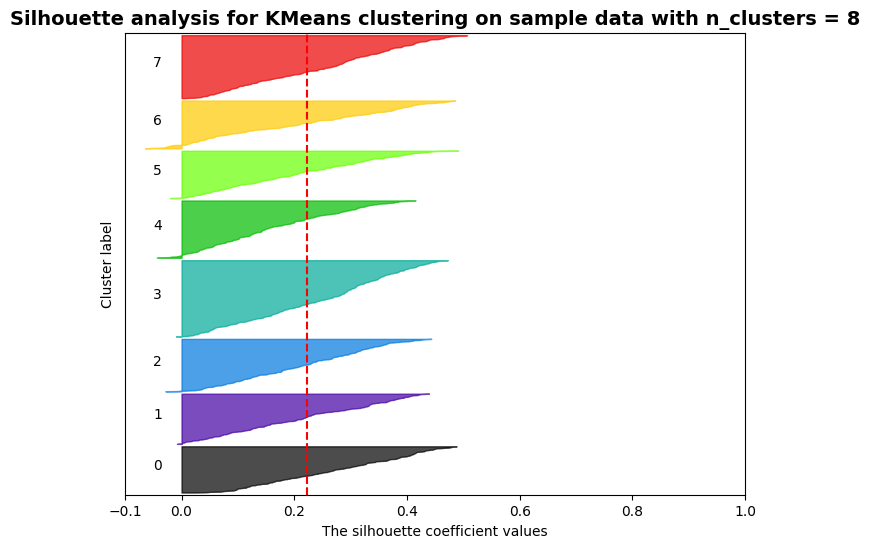

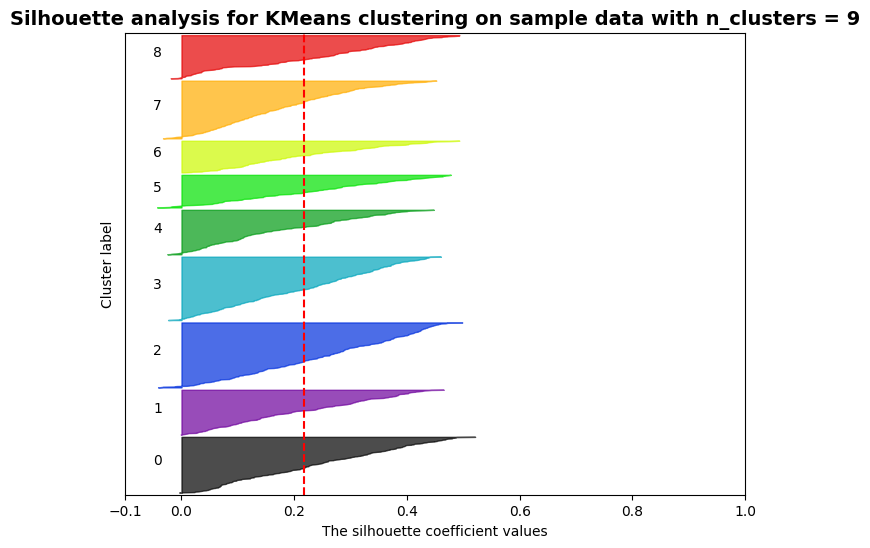

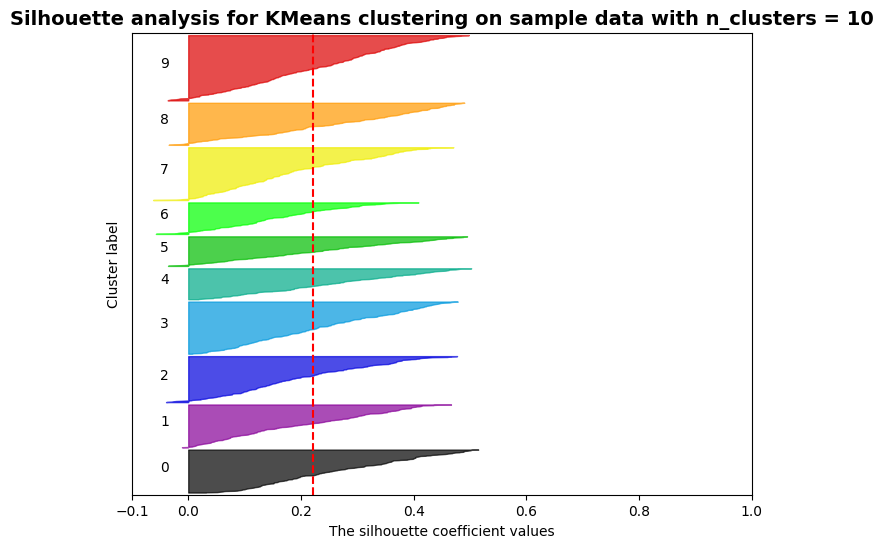

In [195]:
range_n_clusters = range(2,11)

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples


for n_clusters in range_n_clusters:
    # Create a plot
    fig, ax  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

What is, in your opinion, the best number of centers to choose?

In [196]:
# For n_clusters = 2 The average silhouette_score is : 0.3724888054738245
# For n_clusters = 2 The average silhouette_score is : 0.4012285898271234

Apply K-means again with the optimal number of centers.

In [197]:
kmeans_optimal = KMeans(n_clusters=2, max_iter=500)
kmeans_optimal.fit(df)



KMeans(max_iter=500, n_clusters=2)

In [198]:


kmeans_optimal.fit(df)


KMeans(max_iter=500, n_clusters=2)

How many samples are in each cluster?

In [199]:

labels_optimal = kmeans_optimal.labels_


unique, counts = np.unique(labels_optimal, return_counts=True)


for u, c in zip(unique, counts):
    print(f'Cluster {u}: {c} samples')


Cluster 0: 1023 samples
Cluster 1: 977 samples


Since, the true class of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

In [200]:
from sklearn.metrics.cluster import contingency_matrix

true_labels = df['price_range']

contingency_mat = contingency_matrix(true_labels, labels_optimal)

contingency_mat

array([[  0, 500],
       [103, 397],
       [420,  80],
       [500,   0]])

2- Discuss the obtained matrix

In [201]:
# 0, 500 : Pour la première classe, tous les 500 échantillons ont été incorrectement classés dans une autre classe.
# 101, 399 : Pour la deuxième classe, 399 échantillons ont été correctement classés, tandis que 101 ont été incorrectement classés dans une autre classe.
# 420, 80 : Pour la troisième classe, seulement 80 échantillons ont été correctement classés, tandis que 420 ont été incorrectement classés dans une autre classe.
# 500, 0 : Pour la quatrième classe, tous les 500 échantillons ont été correctement classés.
# Donc, le modèle de classification a du mal à classer correctement les échantillons de la première et de la troisième classe, 
# tandis qu'il est très précis pour la quatrième classe et relativement précis pour la deuxième classe.

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

In [202]:
# rand index
from sklearn import metrics
metrics.rand_score(true_labels, cluster_labels)


0.6750820410205103

In [203]:
# adjusted rand index
metrics.adjusted_rand_score(true_labels, cluster_labels)
# rand index ajusted = 0.35017352338640034 : Avec cette mesure qui prend en compte les coïncidences de similarité (grâce au hasard), on voit qu'elle est inférieure à celle non ajustée, ce qui est normal.

0.35017352338640034

In [204]:
# homogeneity
metrics.homogeneity_score(true_labels, cluster_labels)
# homogeneity = 0.32879961873397207 : Les clusters ne sont pas très homogènes, indiquant qu'il y a un mélange de différentes classes parmis les clusters.

0.32879961873397207

In [205]:
# completeness
metrics.completeness_score(true_labels, cluster_labels)
# completeness = 0.6578502905647545 : Les clusters sont assez complets, indiquant que la plupart des classes sont regroupés dans le même cluster.

0.6578502905647545

In [206]:
# V-measure
metrics.v_measure_score(true_labels, cluster_labels)
# v-measure = 0.43845526702670556 : Cela indique un accord moyen entre les clusters.

0.43845526702670556

4- Discuss the obtained scores.

In [207]:
# rand index = 0.6750820410205103 : On observe que les clusters sont moyennement similaires entre eux. Il y a la présence d'une structure intéressante.
# rand index ajusted = 0.35017352338640034 : on observe que les deux clusters ne sont pas très similaires entre eux,

### Clustering algorithm 2: Hierarchical clustering

Apply the hierarchical clustering algorithm with 2 centers. Look at the default parameters and make sure the algorithm is based on the single linkage method.

In [208]:
from sklearn.cluster import AgglomerativeClustering


hierarchical_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
hierarchical_clustering.fit(df)


AgglomerativeClustering(linkage='single')

How many samples are in each cluster?

In [209]:
labels = hierarchical_clustering.labels_

unique, counts = np.unique(labels, return_counts=True)


for u, c in zip(unique, counts):
    print(f'Cluster {u}: {c} samples')


Cluster 0: 1999 samples
Cluster 1: 1 samples


Apply the hierarchical clustering algorithm again. This time,  change the linkage method to complete linkage.

In [210]:
hierarchical_clustering_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
hierarchical_clustering_complete.fit(df)


AgglomerativeClustering(linkage='complete')

How many samples are in each cluster?

In [211]:
labels_complete = hierarchical_clustering_complete.labels_

unique, counts = np.unique(labels_complete, return_counts=True)


for u, c in zip(unique, counts):
    print(f'Cluster {u}: {c} samples')


Cluster 0: 980 samples
Cluster 1: 1020 samples


Apply the hierarchical clustering algorithm once again. This time, change the linkage method to ward linkage.

In [212]:
hierarchical_clustering_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clustering_ward.fit(df)


AgglomerativeClustering()

How many samples are in each cluster?

In [213]:
labels_ward = hierarchical_clustering_ward.labels_

unique, counts = np.unique(labels_ward, return_counts=True)


for u, c in zip(unique, counts):
    print(f'Cluster {u}: {c} samples')


Cluster 0: 1267 samples
Cluster 1: 733 samples


Compare the three results. Is the type of linkage method used important? Which one gave you the best result? For the rest of this section, use the best linkage method.

In [214]:
# Single Linkage : Cette méthode a produit un cluster avec 1999 échantillons et un autre avec seulement 1 échantillon. 
# Cela suggère que cette méthode a du mal à distinguer les différences entre les échantillons, ce qui entraîne un grand cluster et un très petit cluster. Cette méthode peut ne pas être idéale pour ce jeu de données.

# Complete Linkage : Cette méthode a produit deux clusters plus équilibrés, avec 980 et 1020 échantillons respectivement. 
# Cela suggère que cette méthode est capable de distinguer les différences entre les échantillons de manière plus efficace que la méthode "single linkage".

# Ward Linkage : Cette méthode a produit deux clusters avec 1267 et 733 échantillons respectivement. 
# Bien que la distribution ne soit pas aussi équilibrée que celle obtenue avec la méthode "complete linkage", elle est plus équilibrée que celle obtenue avec la méthode "single linkage".

# En se basant sur ces résultats, la méthode "complete linkage" semble donner les meilleurs résultats car elle produit la distribution la plus équilibrée des échantillons entre les clusters. 
# Cependant, il est important de noter que la "meilleure" méthode de liaison dépend du contexte spécifique et des objectifs de l'analyse. 
# Par exemple, si l'objectif est de maximiser la séparation entre les clusters, alors la méthode "ward linkage" pourrait être préférable.

In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

For n_clusters = 2 The average silhouette_score is : 0.3724888054738245
For n_clusters = 3 The average silhouette_score is : 0.25734182979412695
For n_clusters = 4 The average silhouette_score is : 0.1495743242712764
For n_clusters = 5 The average silhouette_score is : 0.13220132311624572


For n_clusters = 6 The average silhouette_score is : 0.14611799464669065
For n_clusters = 7 The average silhouette_score is : 0.13198954483629116
For n_clusters = 8 The average silhouette_score is : 0.13672013858851625
For n_clusters = 9 The average silhouette_score is : 0.14453459965922186
For n_clusters = 10 The average silhouette_score is : 0.13567397068663217


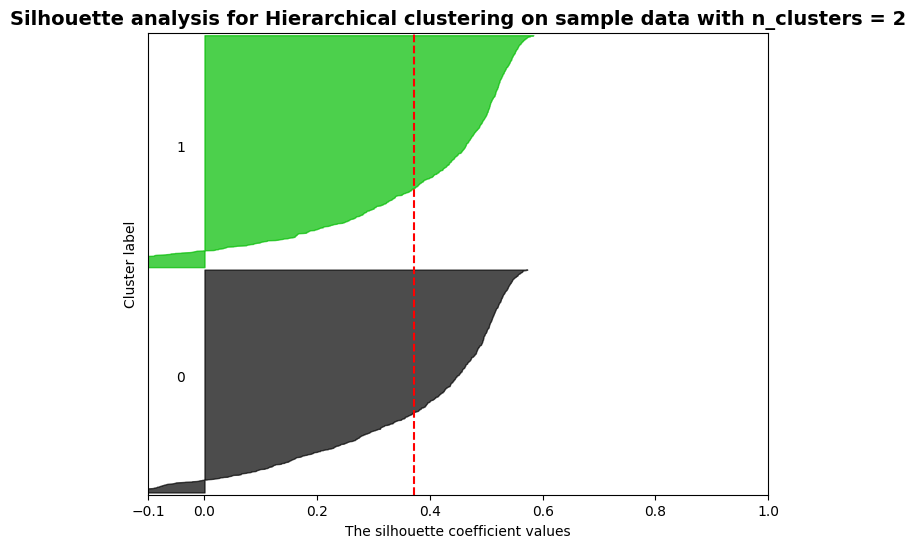

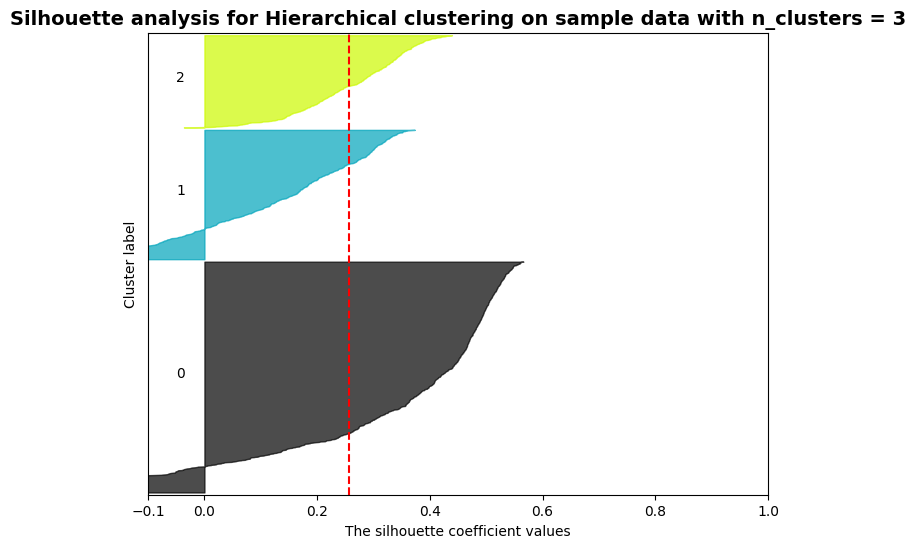

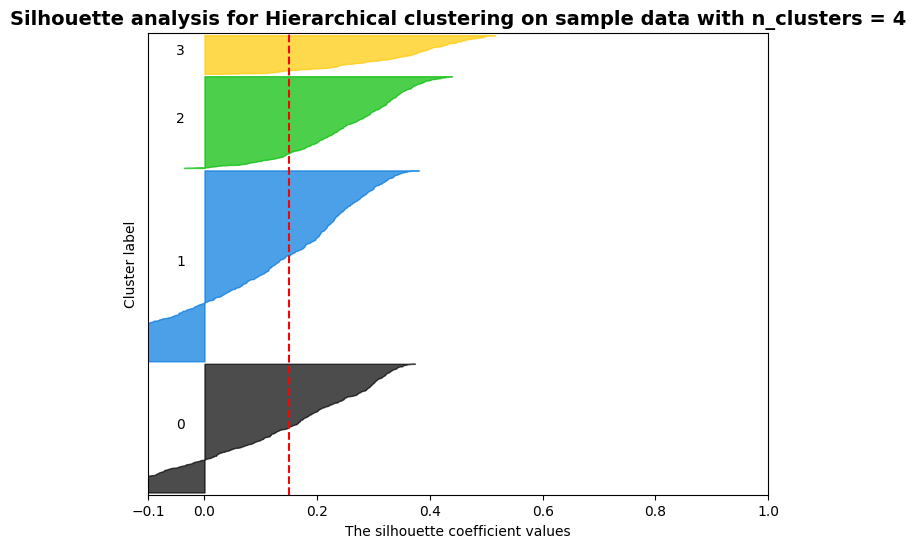

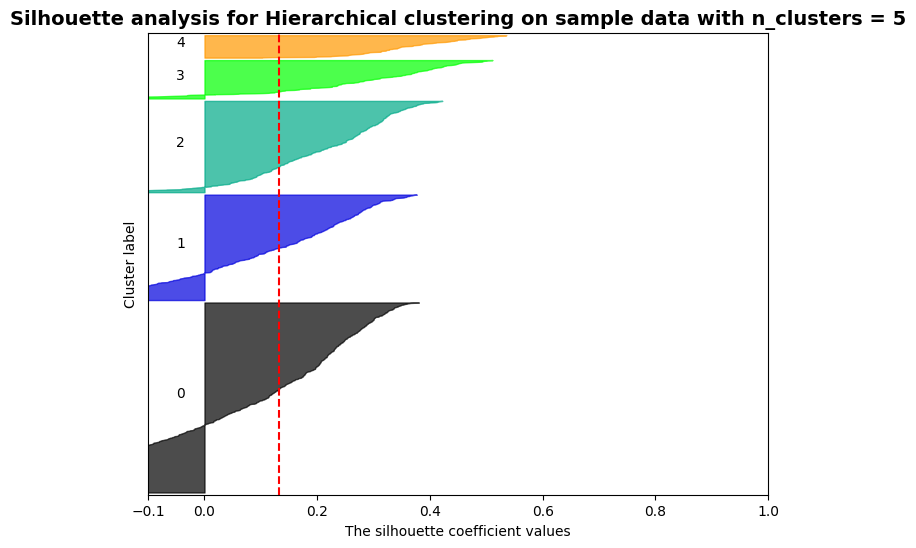

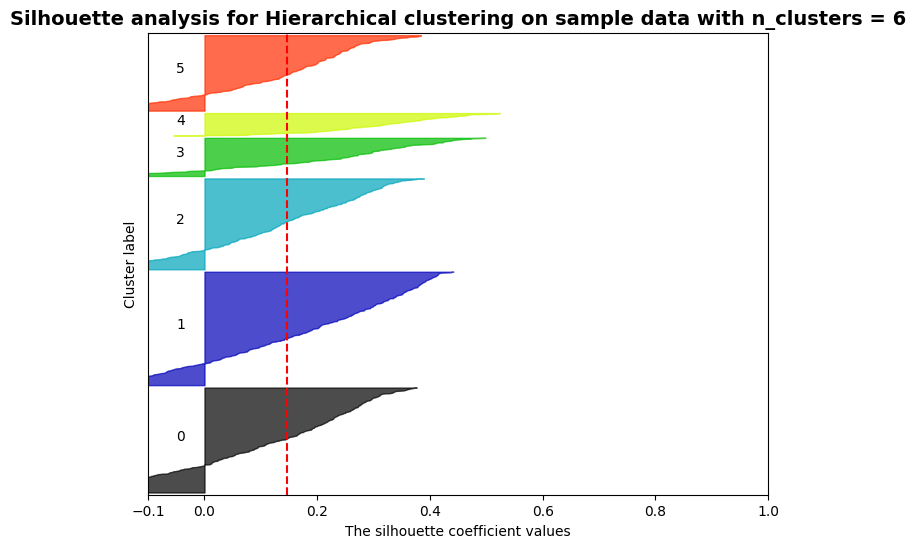

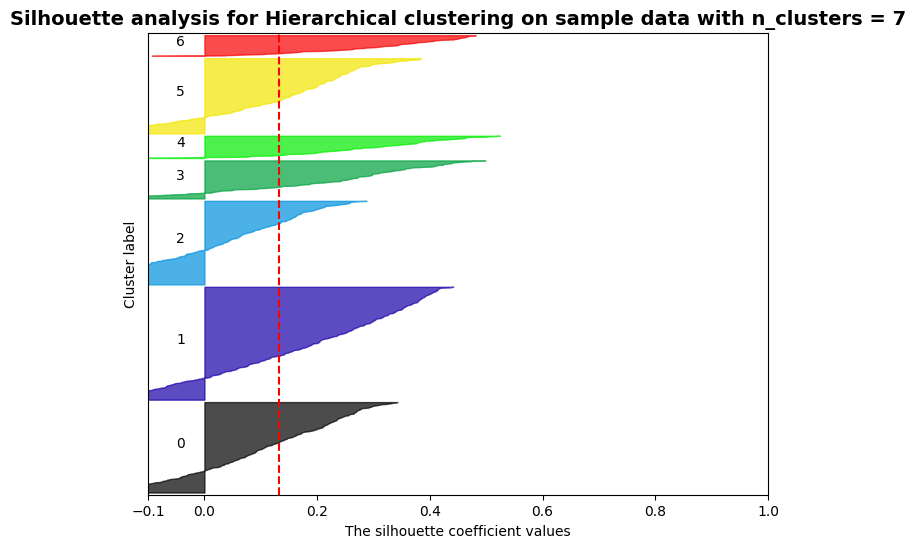

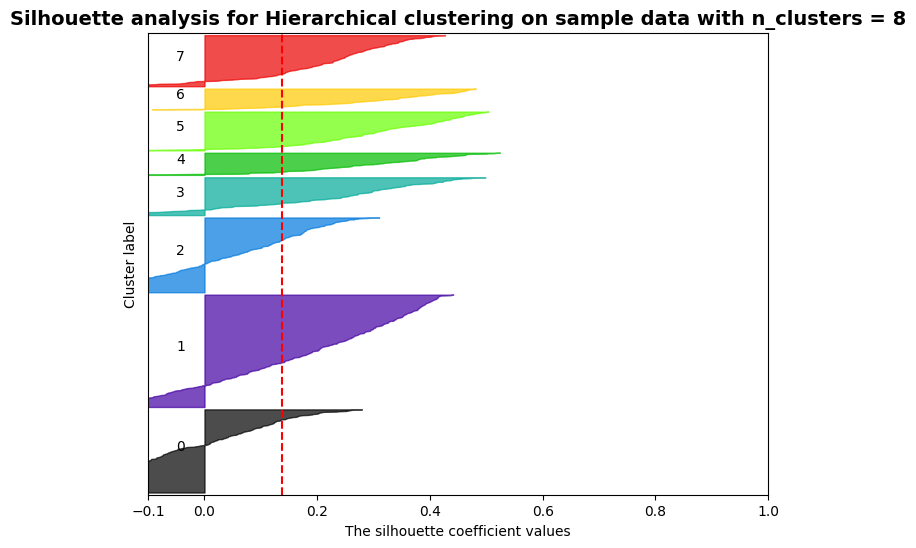

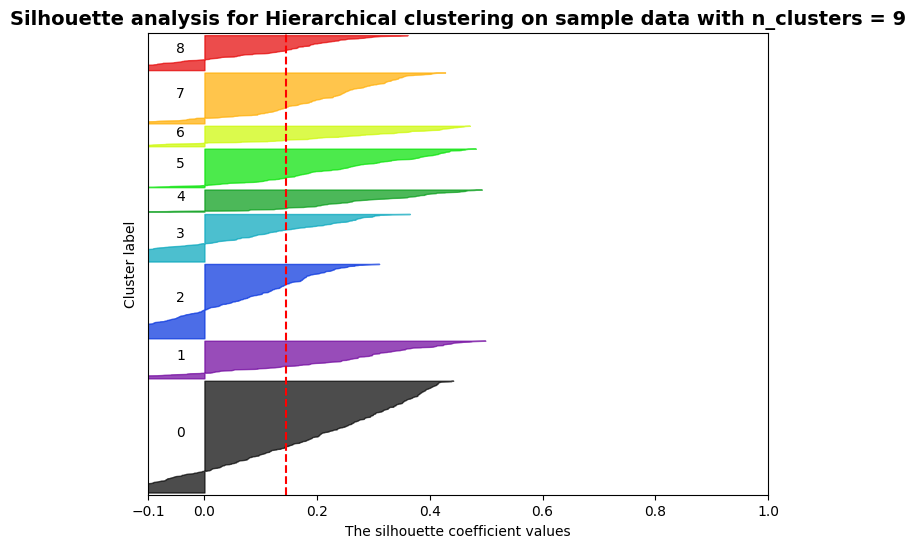

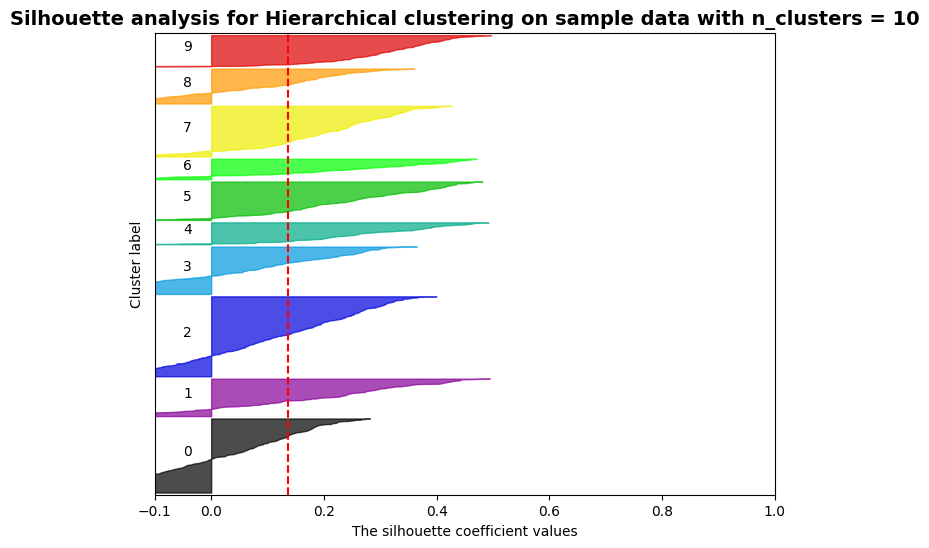

In [215]:
range_n_clusters =  range(2,11)

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples


for n_clusters in range_n_clusters:
    # Create a plot
    fig, ax  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters and the linkage method you
    # determined worked best.
    clusterer =  AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for Hierarchical clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

What is, in your opinion, the best number of centers to choose?

In [216]:
# La plus grande valeur de la moyenne donne le nombre optimal de clusters, donc 2 clusters 
# For n_clusters = 2 The average silhouette_score is : 0.3724888054738245

Apply hierarchical clustering again with the optimal number of centers.

In [217]:
hierarchical_clustering_optimal = AgglomerativeClustering(n_clusters=2, linkage='complete')
hierarchical_clustering_optimal.fit(df)


AgglomerativeClustering(linkage='complete')

How many samples are in each cluster?

In [218]:
labels_optimal = hierarchical_clustering_optimal.labels_
unique, counts = np.unique(labels_optimal, return_counts=True)


for u, c in zip(unique, counts):
    print(f'Cluster {u}: {c} samples')


Cluster 0: 980 samples
Cluster 1: 1020 samples


Since, the true class of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

In [219]:
contingency_mat = contingency_matrix(true_labels, labels_optimal)

contingency_mat



array([[  0, 500],
       [113, 387],
       [368, 132],
       [499,   1]])

Apply K-means again with the optimal number of centers.

2- Discuss the obtained matrix.

In [ ]:
# 0, 500 : Pour la première classe, tous les 500 échantillons ont été incorrectement classés dans une autre classe.
# 113, 387 : Pour la deuxième classe, 387 échantillons ont été correctement classés, tandis que 113 ont été incorrectement classés dans une autre classe.
# 368, 132 : Pour la troisième classe, seulement 132 échantillons ont été correctement classés, tandis que 368 ont été incorrectement classés dans une autre classe.
# 499, 1 : Pour la quatrième classe, presque tous les échantillons ont été correctement classés, avec seulement 1 échantillon incorrectement classé.

# Donc, cela suggère que le modèle de classification a du mal à classer correctement les échantillons de la première et de la troisième classe, 
# tandis qu'il est très précis pour la quatrième classe et relativement précis pour la deuxième classe.

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

4- Discuss the obtained scores.

OPTIONAL: plot the dendrogram

## TD3 (part II): Spectral clustering and comparison

### Clustering algorithm 3: Spectral clustering

Apply the spectral clustering algorithm with 2 centers.

How many samples are in each cluster?

Apply the spectral clustering algorithm again. This time, change the method to construct the affinity matrix to "nearest_neighbors".

How many samples are in each cluster?

Compare the two results. Is the method used to construct the affinity matrix important? Which one gave you the best result? For the rest of this section, use the best method.

In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

In [220]:
range_n_clusters =   ### TO COMPLETE

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples


for n_clusters in range_n_clusters:
    # Create a plot
    fig, ax  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters. Make sure you use the "affinity"
    # method that gave you the best results.
    clusterer =  ### TO COMPLETE
    cluster_labels = ### TO COMPLETE

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = ### TO COMPLETE
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = ### TO COMPLETE

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for Spectral clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

SyntaxError: invalid syntax (1196127105.py, line 1)

What is, in your opinion, the best number of centers to choose?

Apply spectral clustering again with the optimal number of centers.

How many samples are in each cluster?

Since, the true label of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

2- Discuss the obtained matrix.

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

4- Discuss the obtained scores.

### Conclusion

In your opinion, which method gave the better results for this dataset?

Usually, when we apply different clustering methods, it's because we do not know the classes. In such situation, we compare the different clustering models we obtained with each method to each other to see if they are corroborating.
<br>
Pick two of the three clustering methods used above, and use the same metrics as before to compare them (do not rerun the models, just compare the predicted clusters you obtained with each method).  

Discuss the obtained scores.

At the beginning of the practical, you noticed the number of classes in the data. After completing all the work, applying silhouette and finding the optimal number of clusters, were you expecting the results you obtained? Can you find an explanation for the result?